###  Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01
0,Casos nuevos con sintomas,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,3237,3343,4428,3618,3956,4128,3355,3736,4437,5082
1,Casos totales,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,65393,69102,73997,77961,82289,86943,90638,94858,99688,105159
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26546,28148,29302,30915,33540,36115,38598,40431,42727,44946
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,673,718,761,806,841,890,944,997,1054,1113
4,Casos activos,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,38174,40236,43934,46240,47908,49938,51096,53430,55907,59100
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,299,366,467,346,372,526,340,484,393,389
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,3536,3709,4895,3964,4328,4654,3695,4220,4830,5471


In [3]:
fallecidos  = data[data["Item"]=="Fallecidos"].values.tolist()[0][1:]
contagiados = data[data["Item"]=="Casos totales"].values.tolist()[0][1:]
df_letalidad = pd.DataFrame({
    'fecha': data.columns[1:],
    'contagiados': contagiados,
    'fallecidos': fallecidos
})
df_letalidad["letalidad"] = (df_letalidad["fallecidos"] / df_letalidad["contagiados"]) * 100

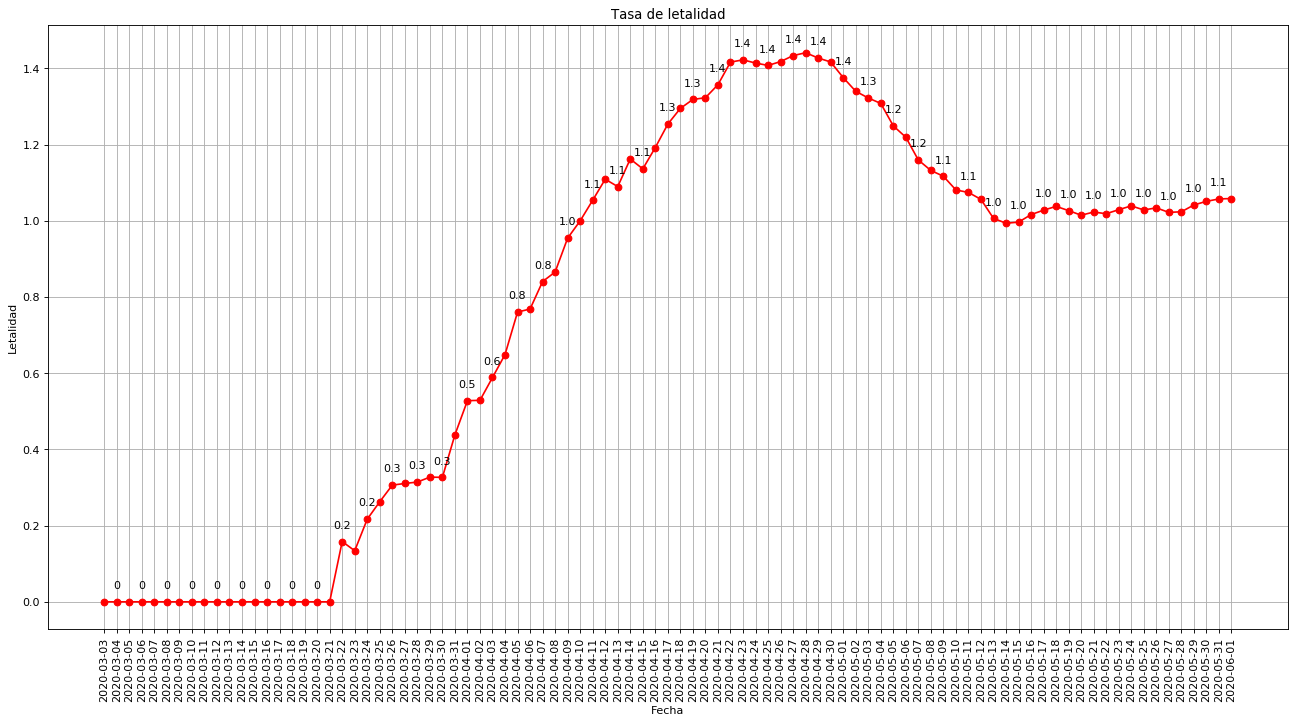

In [4]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        if float(Y[i]) == 0.0 :
            number = "0"
        else:
            number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
            
        if aux == 1:    
            plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 10),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')
            aux = 0
        else: 
            aux = 1
        
        

Y            = df_letalidad["letalidad"].values.tolist()
X            = data.columns[1:]
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, 'ro-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel('Letalidad')
plt.title('Tasa de letalidad')
plt.grid()
plt.xticks(X, rotation='vertical')
plt.show()

# Tasa de letalidad por regiones

In [5]:
url_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_region = pd.read_csv(url_region)
data_region

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020-05-28,562,1957,2248,202,482,2730,69915,705,1120,1205,1677,1954,318,814,14,1040,86943
87,2020-05-29,582,2093,2318,207,537,2842,72910,745,1180,1242,1778,1989,330,822,16,1047,90638
88,2020-05-30,588,2250,2429,215,597,3037,76251,756,1256,1256,1888,2060,345,860,16,1054,94858
89,2020-05-31,619,2361,2510,218,628,3167,80504,785,1297,1257,1979,2071,356,863,17,1056,99688


In [6]:
date = str(datetime.date.today())

In [7]:
contagiados_total_region = data_region[data_region["Region"]== date].values.tolist()[0][1:]
regiones = data_region.columns.tolist()[1:]

In [8]:
df_letalidad_regiones = pd.DataFrame({
    'Region': regiones,
    'contagiados': contagiados_total_region
})

In [9]:
url_fallecidos_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv"
data_fallecidos_region = pd.read_csv(url_fallecidos_region)
data_fallecidos_region = data_fallecidos_region.rename(columns={'Region':'Fecha'})
fallecidos_region = data_fallecidos_region[data_fallecidos_region["Fecha"]==date].values.tolist()[0][1:]

In [10]:
df_letalidad_regiones["Fallecidos"] = fallecidos_region

In [11]:
df_letalidad_regiones["Letalidad"] = (df_letalidad_regiones["Fallecidos"]/df_letalidad_regiones["contagiados"]) * 100
df_letalidad_regiones

,Region,contagiados,Fallecidos,Letalidad
0,Arica y Parinacota,636,8,1.257862
1,Tarapacá,2526,22,0.870942
2,Antofagasta,2585,32,1.237911
3,Atacama,232,0,0.000000
4,Coquimbo,668,2,0.299401
5,Valparaíso,3348,70,2.090800
6,Metropolitana,85239,824,0.966694
7,O’Higgins,813,18,2.214022
8,Maule,1341,17,1.267711
9,Ñuble,1290,23,1.782946


In [12]:
X = regiones
Y = df_letalidad_regiones["Letalidad"].tolist()

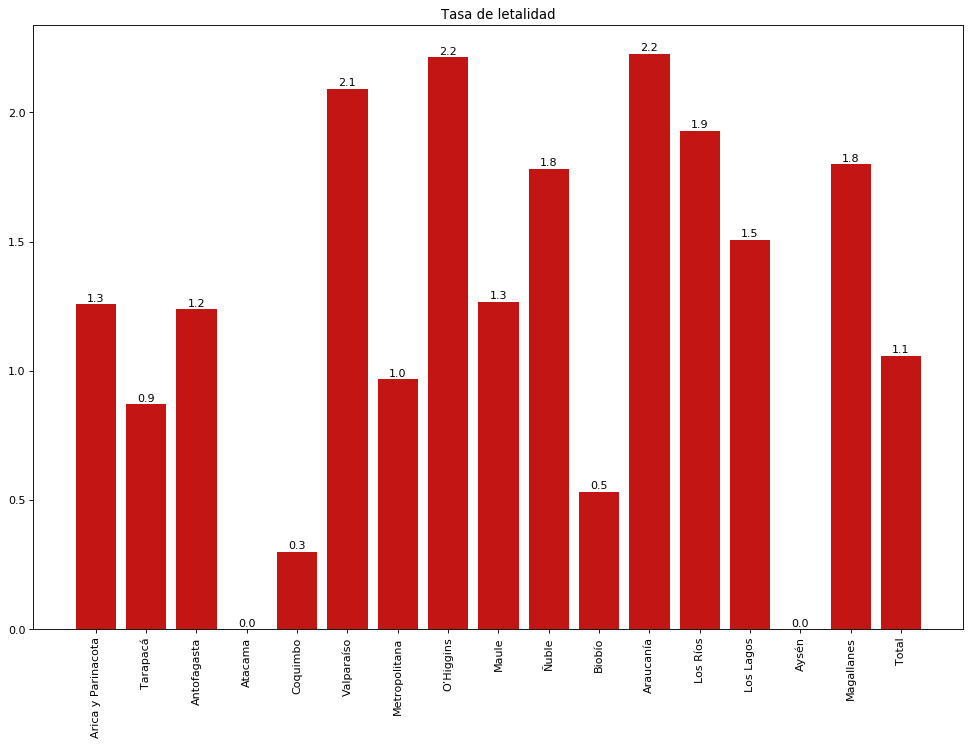

In [13]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
        plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 1),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')    
            
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y, color='#C41515')
plt.title("Tasa de letalidad")
labelonbars(X, Y)
plt.xticks(X, rotation='vertical')
plt.show()